In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spi_class import *
from scipy import stats
import seaborn as sns

In [219]:
'''
prec_data = pd.read_csv('./data/rehana_rf/t1.csv')
prec_data.fillna(0)
prec_data['Prec'] = prec_data[['Prec_Daddi']].max(axis=1)
final_prec = prec_data
final_prec['Date'] = pd.to_datetime(final_prec['Date'], format="%Y-%m-%d")
final_prec = final_prec.set_index('Date')
'''

In [2]:
def convert(prec_data, count):
    temp = pd.DataFrame()
    for index, row in prec_data.iterrows():
        final_prec = pd.DataFrame(columns=['Prec'+str(count)])
        #print(len(row)-row.isnull().sum()+1 )
        final_prec = pd.concat([final_prec, pd.DataFrame(row.values[2:], columns=['Prec'+str(count)])], axis=0)
        final_prec.insert(1, "Month", row.values[1])
        final_prec.insert(1, "Year", row.values[0])
        final_prec['Day'] = list(range(1, len(row)-1))
        temp = pd.concat([temp,final_prec], axis=0)
    temp.dropna(subset = ["Prec"+str(count)], inplace=True)
    #temp.to_csv("temp.csv")
    return temp

temp1 = convert(pd.read_csv('./data/cluster-3/hatkanangale.csv', header=None), 1)
temp2 = convert(pd.read_csv('./data/cluster-3/kagal.csv', header=None), 2)
temp3 = convert(pd.read_csv('./data/cluster-3/karveer.csv', header=None), 3)
temp4 = convert(pd.read_csv('./data/cluster-3/kolhapur.csv', header=None), 4)
temp5 = convert(pd.read_csv('./data/cluster-3/panhala.csv', header=None), 5)
temp6 = convert(pd.read_csv('./data/cluster-3/radhanagari.csv', header=None), 6)
temp7 = convert(pd.read_csv('./data/cluster-3/sadalga.csv', header=None), 7)

temp7.head()

,Prec7,Year,Month,Day
0,0.0,1981.0,1.0,1
1,0.0,1981.0,1.0,2
2,0.0,1981.0,1.0,3
3,0.0,1981.0,1.0,4
4,0.0,1981.0,1.0,5


In [3]:
date1 = '1980-01-01'
date2 = '2012-11-12'
mydates = pd.date_range(date1, date2).tolist()
cd=pd.DataFrame(mydates)
cd.columns = ['Date']
cd['Year'] = pd.DatetimeIndex(cd['Date']).year
cd['Month']=pd.DatetimeIndex(cd['Date']).month
cd['Day']=pd.DatetimeIndex(cd['Date']).day

In [4]:
cd = pd.merge(cd, temp1, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])
cd = pd.merge(cd, temp2, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])
cd = pd.merge(cd, temp3, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])
cd = pd.merge(cd, temp4, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])
cd = pd.merge(cd, temp5, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])
cd = pd.merge(cd, temp6, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])
cd = pd.merge(cd, temp7, how='left', left_on = ['Month','Year','Day'], right_on = ['Month','Year','Day'])

In [5]:
cd.head()

,Date,Year,Month,Day,Prec1,Prec2,Prec3,Prec4,Prec5,Prec6,Prec7
0,1980-01-01,1980,1,1,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1,1980-01-02,1980,1,2,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2,1980-01-03,1980,1,3,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,1980-01-04,1980,1,4,0.0,0.0,NaN,0.0,0.0,0.0,NaN
4,1980-01-05,1980,1,5,0.0,0.0,NaN,0.0,0.0,0.0,NaN


In [6]:
cd.fillna(0, inplace=True)
cd['Prec'] = cd[['Prec1', 'Prec2', 'Prec3', 'Prec4', 'Prec5', 'Prec6', 'Prec7']].max(axis=1)
final_prec = cd
final_prec.loc[final_prec['Prec'] > 100, 'Prec'] = 100
final_prec['Date'] = pd.to_datetime(final_prec['Date'], format="%Y-%m-%d")
final_prec = final_prec.set_index('Date')
final_prec.shape

(12005, 11)

Text(0.5, 1.0, 'Precipitation')

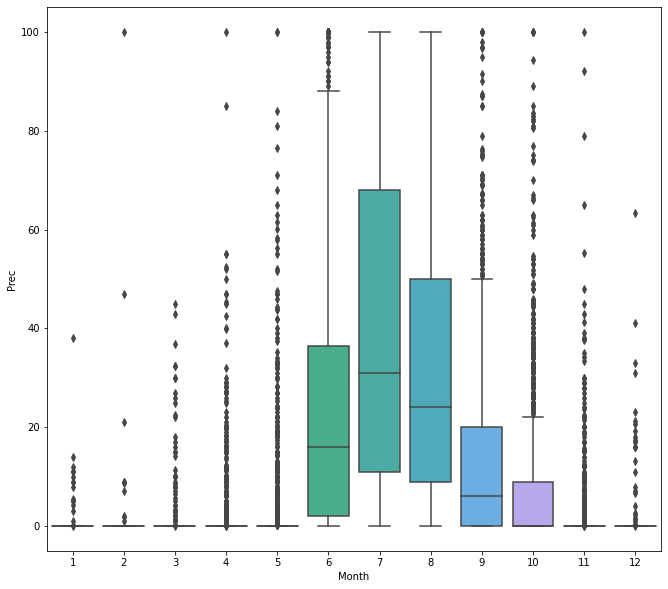

In [182]:
final_prec['Year'] = final_prec.index.year
final_prec['Month'] = final_prec.index.month
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=final_prec, x='Month', y='Prec', ax=axes)
ax.set_title('Precipitation')

In [7]:
#weekly_prec = final_prec[['Prec']].resample('W').sum()
monthly_prec = final_prec[['Prec']].resample('M').sum()
#weekly_prec.shape

In [82]:
def create_datelist(start_date, n_months):

    dates = [start_date + relativedelta(months=i) for i in range(0, n_months)]

    return np.array(dates)

def plot_index(time, data, save_file=None, index_type='SPI'):

    b_width = 22
    pos_inds = np.where(data >= 0.)[0]
    neg_inds = np.where(data < 0.)[0]

    data = np.squeeze(data)

    fig, ax = plt.subplots()
    ax.bar(time[pos_inds], data[pos_inds], width=b_width, align='center', color='b')
    ax.bar(time[neg_inds], data[neg_inds], width=b_width, align='center', color='r')
    ax.grid(True)
    ax.set_xlabel("Date")
    ax.set_ylabel(index_type)

    if save_file:
        plt.savefig(save_file, dpi=400)
    else:
        plt.show()

def pearsonr_ci(x,y,alpha=0.05):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

def calc_index(df, timescale, distribution, start_date, col_name, plot=False):
    df=pd.DataFrame(df)
    data=np.array(df)

    df.columns = ['Prec']

    #spi_timescale = 4 #4 #8 #4
    X_scale_prec = df['Prec'].rolling(timescale).mean()
    X_np_prec = X_scale_prec.to_numpy()
        
        
    df_shape = X_scale_prec.shape
    X_np_prec = X_np_prec[~np.isnan(X_np_prec)]

    spi = SPI()

    spi.set_rolling_window_params(
        span=1, window_type=None, center=True
    )

    # Set distribution parameters
    spi.set_distribution_params(dist_type=distribution)  #'exp'

    # Calculate SPI
    data_prec,score_prec,par_prec = spi.calculate(X_np_prec, starting_month=1)

    #print("Score: ", score_prec)

    X2_prec=data_prec.flatten()

    for i in range(len(df)-len(data_prec)): #len(weekly_prec)-len(data_prec) len(final_prec)-len(data_prec)
        X2_prec=np.concatenate([[0],X2_prec])
    
    X2_prec[X2_prec==np.inf] = 1.0
    X2_prec[X2_prec==-np.inf] = -1.0
    #print("Data shape: ", X2_prec.shape)
    X2_prec[X2_prec>3] = 3.0
    X2_prec[X2_prec<-3] = -3.0
    spi_dateIndex = pd.DataFrame(X2_prec, columns =[col_name])
    spi_dateIndex['Date'] = pd.date_range(start=start_date, periods=len(X2_prec), freq='M') # freq='W', start='1-12-1966'
    spi_dateIndex = spi_dateIndex.set_index('Date')
    
    if plot:
        plot_index(spi_dateIndex.index, X2_prec, index_type=col_name)
    
    return spi_dateIndex, X2_prec

In [19]:
dis_data = pd.read_excel('./data/KRB_Discharge_Stations/Discharge/Vandur_SUMQH.xls') #Daddi_SUMQH.xls

In [20]:
#dis_data['Discharge'].fillna(dis_data['Discharge'].mean(), inplace=True)
#dis_data['Discharge'].fillna(0, inplace=True)
#dis_data.loc[dis_data['Discharge'] > 100.0, 'Discharge'] = 100.0
#print(dis_data['Discharge'])
dis_data = dis_data.set_index('Date')
monthly_dis = dis_data[['Discharge']].resample('M').sum()
#monthly_dis.head()
weekly_dis = dis_data[['Discharge']].resample('W').sum()
#weekly_dis.head()
#weekly_dis.to_csv("weekly_runoff_bagalkot.csv", index=True)

Text(0.5, 1.0, 'Discharge')

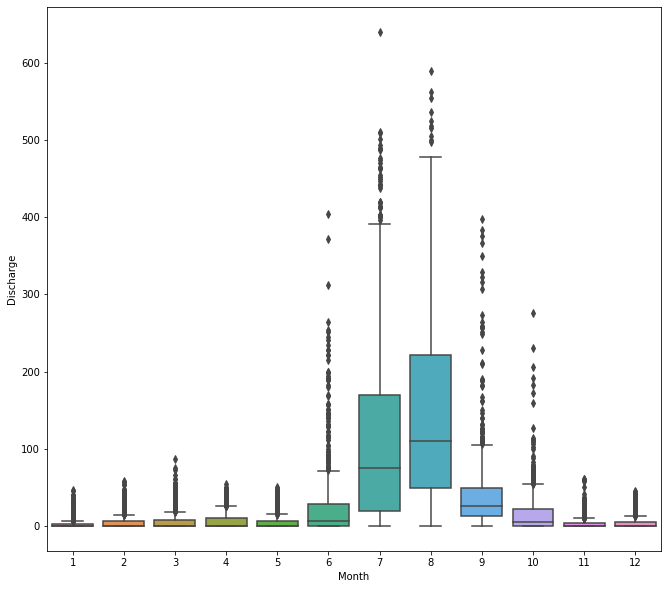

In [180]:
dis_data['Year'] = dis_data.index.year
dis_data['Month'] = dis_data.index.month
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=dis_data, x='Month', y='Discharge', ax=axes)
ax.set_title('Discharge')

Text(69.0, 0.5, 'SPI')

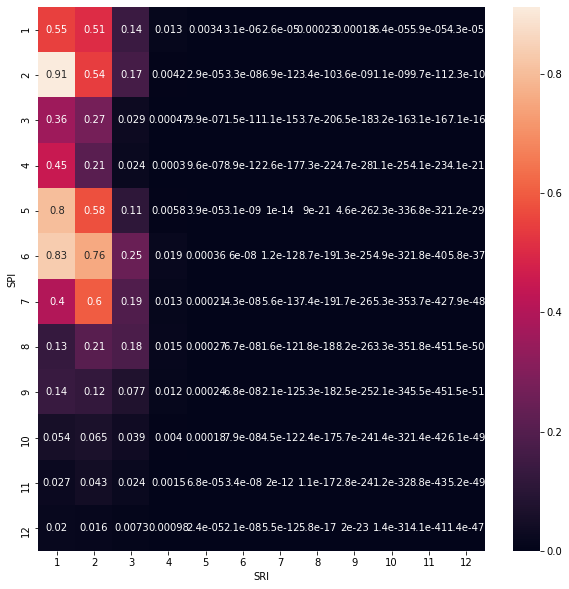

In [79]:
scale = list(range(1,13))

p_mat = []
for i in scale:
    p_arr = []
    for j in scale:
        spi_dateIndex, X2_prec = calc_index(monthly_prec['Prec'], i, 'wei', '1-1-1980', 'spi')
        sri_dateIndex, X2_dis = calc_index(monthly_dis['Discharge'], j, 'gev', '1-6-1979', 'sri')
        r, p, lo, hi = pearsonr_ci(sri_dateIndex.loc['1980-01':sri_dateIndex.index[-1], 'sri'], 
                                   spi_dateIndex.loc['1980-01':sri_dateIndex.index[-1], 'spi'])
        p_arr.append(p)
    p_mat.append(p_arr)
#print(p_mat)

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(p_mat, annot=True, xticklabels=scale, yticklabels=scale)
ax.set_xlabel('SRI')
ax.set_ylabel('SPI')

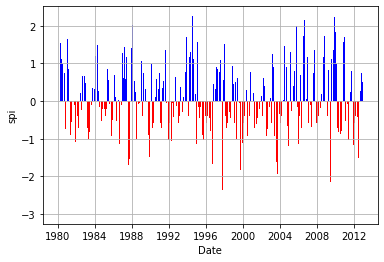

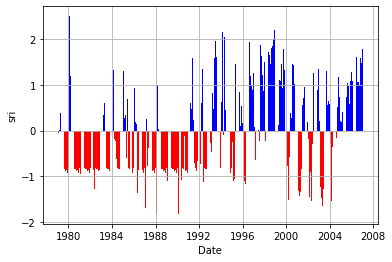

In [83]:
spi_dateIndex, X2_prec = calc_index(monthly_prec['Prec'], 2, 'wei', '1-1-1980', 'spi', plot=True)
sri_dateIndex, X2_dis = calc_index(monthly_dis['Discharge'], 1, 'gev', '1-6-1979', 'sri', plot=True)

In [90]:
'''
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(monthly_prec.index, X2_prec, label='SPI, Scale=2')
ax.plot(monthly_dis.index, X2_dis, label='SRI, Scale=1')
#plt.plot(weekly_prec.index, X2_prec)
#plt.plot(weekly_dis.index, X2_dis)
ax.legend()
ax.grid(True)
'''

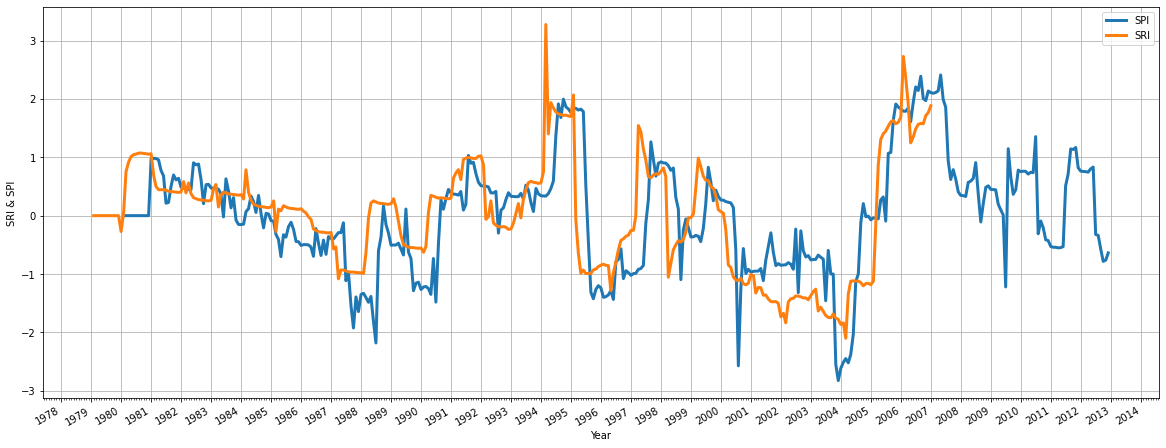

In [66]:
spi_dateIndex, X2_prec = calc_index(monthly_prec['Prec'], 12, 'wei', '1-1-1980', 'spi')
sri_dateIndex, X2_dis = calc_index(monthly_dis['Discharge'], 12, 'gev', '1-6-1979', 'sri')

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(spi_dateIndex.index, spi_dateIndex['spi'], linewidth=3, label='SPI')
ax.plot(sri_dateIndex.index,sri_dateIndex['sri'], linewidth=3, label='SRI')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('SRI & SPI')

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [135]:
import csv
df_spi = pd.DataFrame()
df_spi['date'] = pd.date_range(start='1-1-1980', periods=len(X2_prec), freq='D') #'1-1-1980'
df_spi['discharge'] = X2_prec
df_spi.to_csv('./data/cluster-3/spi_cluster3.csv', index=False)

In [136]:
df_sri = pd.DataFrame()
df_sri['date'] = pd.date_range(start='1-6-1979', periods=len(X2_dis), freq='D') # '1-12-1978'
df_sri['discharge'] = X2_dis
df_sri.to_csv('./data/cluster-3/sri_cluster3.csv', index=False)

In [195]:
spi_pool = pd.read_csv("./data/cluster-3/spi_pool.csv")
spi_summ = pd.read_csv("./data/cluster-3/spi_summary.csv")
sri_pool = pd.read_csv("./data/cluster-3/sri_pool.csv")
sri_summ = pd.read_csv("./data/cluster-3/sri_summary.csv")

In [196]:
import datetime

col_list=['start', 'time', 'end']
scale = 31 #7
spi_summ[col_list] = spi_summ[col_list].apply(pd.to_datetime) #pd.to_datetime(spi_summ[col_list]).dt.date("%Y-%m-%d")
sri_summ[col_list] = sri_summ[col_list].apply(pd.to_datetime) #pd.to_datetime(sri_summ[col_list]).dt.date
spi_start_date = datetime.datetime(1980,1,1) #datetime.datetime(1980,1,1)
sri_start_date = datetime.datetime(1979,1,6) #datetime.datetime(1978,12,1)
spi_summ['start'] = (spi_summ['start'] + (spi_summ['start']-spi_start_date - datetime.timedelta(days=1))*scale + (spi_summ['start']-spi_start_date) // 2).dt.date #-datetime.timedelta(days=1)
spi_summ['end'] = (spi_summ['end'] + (spi_summ['end']-spi_start_date - datetime.timedelta(days=1))*scale + (spi_summ['end']-spi_start_date) // 2).dt.date #-datetime.timedelta(days=1)
spi_summ['duration'] = spi_summ['end'] - spi_summ['start']

sri_summ['start'] = (sri_summ['start'] + (sri_summ['start']-sri_start_date + datetime.timedelta(days=3))*scale + (sri_summ['start']-sri_start_date) // 2).dt.date #-datetime.timedelta(days=1)
sri_summ['end'] = (sri_summ['end'] + (sri_summ['end']-sri_start_date + datetime.timedelta(days=3))*scale + (sri_summ['end']-sri_start_date) // 2).dt.date #-datetime.timedelta(days=1)
sri_summ['duration'] = sri_summ['end'] - sri_summ['start']

In [197]:
spi_summ = spi_summ.set_index('start')
spi_summ.head()

,Unnamed: 0,event.no,time,end,volume,duration,dbt,qmin,tqmin
start,,,,,,,,,
1983-02-13,8,8,1980-02-10,1983-06-23,3.527921,130 days,5,-1.000000,1980-02-09
1984-10-22,12,12,1980-03-04,1985-07-09,3.096421,260 days,8,-0.884053,1980-03-04
1985-10-15,14,14,1980-03-12,1986-03-26,3.005593,162 days,6,-0.932144,1980-03-10
1987-11-01,17,17,1980-04-03,1988-03-10,7.449225,130 days,5,-3.000000,1980-03-31
1990-01-22,23,23,1980-04-29,1990-07-03,5.603626,162 days,6,-1.483668,1980-04-28


In [198]:
sri_summ = sri_summ.set_index('start')
sri_summ.head()

,Unnamed: 0,event.no,time,end,volume,duration,dbt,qmin,tqmin
start,,,,,,,,,
1979-07-15,2,2,1979-01-17,1980-03-31,7.197712,260 days,9,-0.913858,1979-01-16
1980-09-10,3,3,1979-01-30,1981-05-28,7.394797,260 days,9,-0.938891,1979-01-30
1981-10-05,4,4,1979-02-10,1982-05-20,6.182274,227 days,8,-0.913858,1979-02-09
1982-09-27,5,5,1979-02-22,1983-06-14,8.061969,260 days,9,-1.263969,1979-02-15
1983-11-24,6,6,1979-03-06,1984-07-08,5.939155,227 days,8,-0.913858,1979-03-05


In [199]:
#final_prec['lagtime'] = 0
#weekly_prec['lagtime'] = 0
drought_event_pairs = pd.DataFrame(columns = ['Meteorological_drought_beg_date', 'Meteorological_drought_end_date',
                                              'Hydrological_drought_beg_date', 'Hydrological_drought_end_date','Days'])
monthly_prec['lagtime'] = 0
for index, row in spi_summ.iterrows():
    idx = sri_summ.index.searchsorted(index)
    if idx >= sri_summ.shape[0]:
        #print("sri out-of-range")
        continue
    sri_idx = sri_summ.index[idx]
    #lis.append(sri_summ.loc[sri_summ.index[idx]])
    '''
    if spi_summ.loc[index]['end'] < sri_summ.index[idx]:
        continue;
    '''
    start = index
    end = sri_summ.loc[sri_idx]['end']
    #final_prec.loc[start:end, 'lagtime'] = (sri_summ.index[idx]-index).days
    monthly_prec.loc[start:end, 'lagtime'] = (sri_summ.index[idx]-index).days
    a_series = pd.Series([start, end, sri_idx, sri_summ.loc[sri_idx, 'end'], (sri_summ.index[idx]-index).days], index = drought_event_pairs.columns)
    drought_event_pairs = drought_event_pairs.append(a_series, ignore_index=True)

drought_event_pairs.to_csv("./data/cluster-3/drought_event_pairs.csv", index=False)
drought_event_pairs.head(n=15)

,Meteorological_drought_beg_date,Meteorological_drought_end_date,Hydrological_drought_beg_date,Hydrological_drought_end_date,Days
0,1983-02-13,1984-07-08,1983-11-24,1984-07-08,284
1,1984-10-22,1986-08-27,1986-02-13,1986-08-27,479
2,1985-10-15,1986-08-27,1986-02-13,1986-08-27,121
3,1987-11-01,1991-01-06,1989-04-28,1991-01-06,544
4,1990-01-22,1991-12-29,1991-05-16,1991-12-29,479
5,1992-05-16,1994-04-22,1993-07-04,1994-04-22,414
6,1996-02-10,2003-02-12,2002-10-05,2003-02-12,2429
7,1997-05-10,2003-02-12,2002-10-05,2003-02-12,1974
8,1999-03-23,2003-02-12,2002-10-05,2003-02-12,1292
9,2001-03-07,2003-02-12,2002-10-05,2003-02-12,577


In [200]:
#monthly_prec.to_csv("./data/cluster-3/spi_lagtime.csv", index=True) #weekly_prec

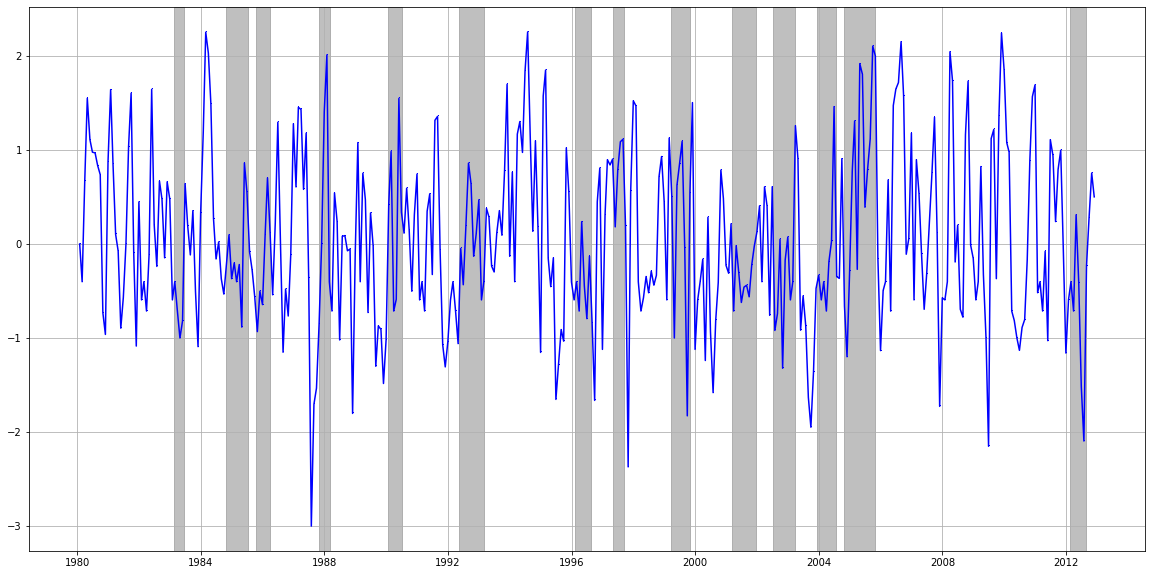

In [201]:
plt.figure(figsize=(20,10))
plt.plot(monthly_prec.index, spi_pool['discharge'], linestyle='-', marker=',', color='b')
plt.grid(True)
for index, row in spi_summ.iterrows():
    if index <monthly_prec.index[-1]:
        plt.axvspan(index, index + row[5], alpha=0.5, color='gray')

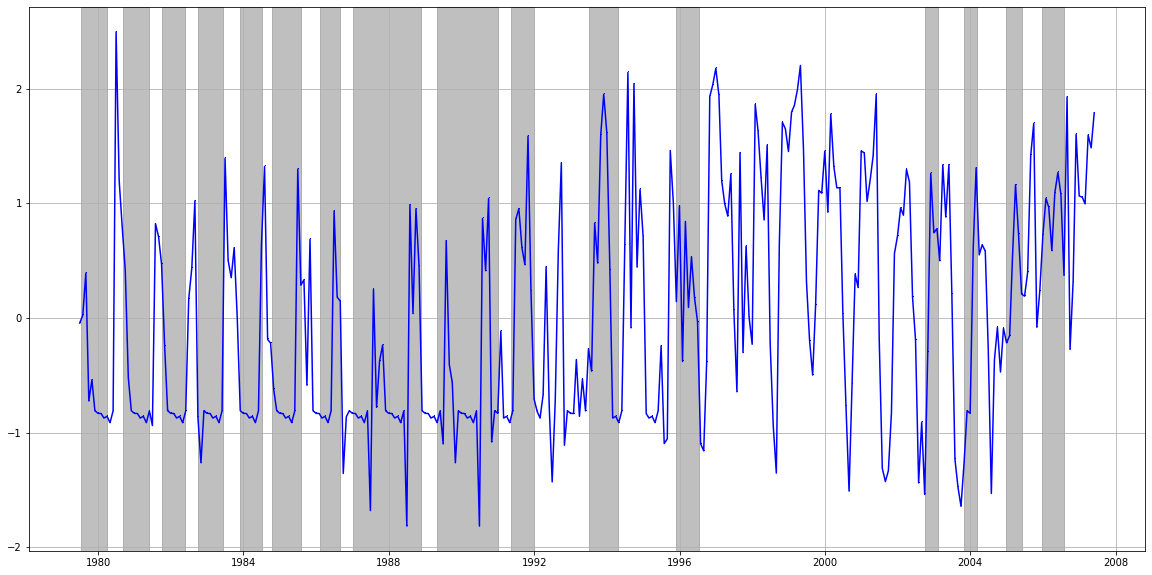

In [165]:
plt.figure(figsize=(20,10))
plt.plot(monthly_dis.index, sri_pool['discharge'], linestyle='-', marker=',', color='b')
plt.grid(True)
for index, row in sri_summ.iterrows():
    if index < monthly_dis.index[-1]:
        plt.axvspan(index, index + row[5], alpha=0.5, color='gray')